In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
import scipy.io as sio

In [4]:
mdict = sio.loadmat("./hw2_data/imgs_for_optical_flow.mat")

In [5]:
def print_img(img, title):
    _ = plt.imshow(img, interpolation=None)
    plt.colorbar()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

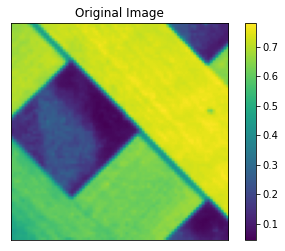

In [6]:
img = mdict["img1"]
print_img(img, "Original Image")

### Blurring Image with Gaussian

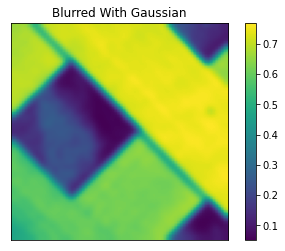

In [7]:
blurred_img = cv2.GaussianBlur(img,(5,5),0)
print_img(blurred_img, "Blurred With Gaussian")

### Getting Derivative Filters

In [8]:
hx1, hy0 = cv2.getDerivKernels(1,0,3)
hx0, hy1 = cv2.getDerivKernels(0,1,3)
hx2, _ = cv2.getDerivKernels(2,0,3)
_, hy2 = cv2.getDerivKernels(0,2,3)

### Results

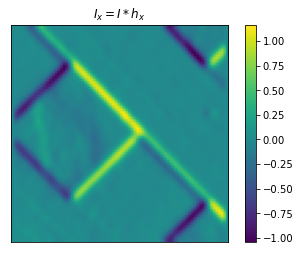

In [9]:
res_x1 = cv2.sepFilter2D(blurred_img,-1,hx1,hy0)
print_img(res_x1, "$I_x = I * h_x$")

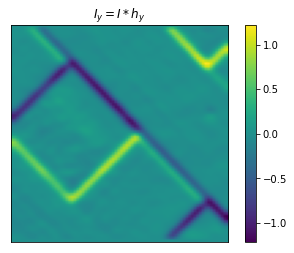

In [10]:
res_y1 = cv2.sepFilter2D(blurred_img,-1,hx0,hy1)
print_img(res_y1, "$I_y = I * h_y$")

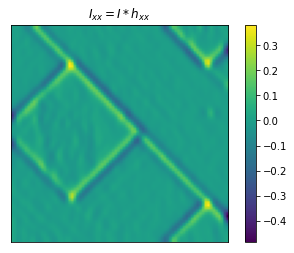

In [11]:
res_x2 = cv2.sepFilter2D(blurred_img,-1,hx2,hy0)
print_img(res_x2, "$I_{xx} = I * h_{xx}$")

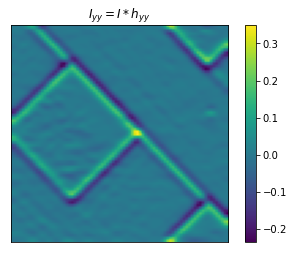

In [12]:
res_y2 = cv2.sepFilter2D(blurred_img,-1,hx0,hy2)
print_img(res_y2, "$I_{yy} = I * h_{yy}$")